<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [129]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [130]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [132]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [134]:
# 기술통계 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [137]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]


**2) 가변수화**

In [139]:
# 가변수화 대상: sex, smoker, region
dumm_cols = ['sex', 'smoker', 'region']

# 가변수화

x = pd.get_dummies(x, columns=dumm_cols, drop_first=True, dtype=int)
# 확인
x.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**3) 학습용, 평가용 데이터 분리**

In [141]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=1)

**4) 정규화**

In [143]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
x_train_s= scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [145]:
# xgboost 설치
# !pip install xgboost

In [146]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [224]:
# 불러오기

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score





**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [227]:
# 선언하기
model = LinearRegression()

In [229]:
# 성능예측
cv_score = cross_val_score(LinearRegression(), x_train_s, y_train, cv=5)


In [230]:
# 결과확인
print('평균:', cv_score.mean())

평균: 0.7450313111847254


In [233]:
# 결과수집
result={}
result['Linear Regression'] = cv_score.mean()


**2) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [236]:
# 선언하기
model = KNeighborsRegressor()

In [238]:
# 성능예측
cv_score = cross_val_score(model, x_train_s, y_train, cv=5)



In [240]:

# 결과확인
print('평균:', cv_score.mean())

평균: 0.7299441631128959


In [242]:
# 결과수집
result['KNN'] = cv_score.mean()

**3) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [245]:
# 선언하기
model = DecisionTreeRegressor()

In [247]:
# 성능예측

cv_score =cross_val_score(model , x_train, y_train , cv= 5)

In [249]:
# 결과확인
print('평균:', cv_score.mean())

평균: 0.673332258680628


In [251]:
# 결과수집
result['DecisionTreeRegressor'] = cv_score.mean()

**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [254]:
# 선언하기
model = RandomForestRegressor()

In [256]:
# 성능예측
cv_score = cross_val_score(model ,x_train, y_train, cv =5)

In [257]:
# 결과확인
print('평균:', cv_score.mean())

평균: 0.8280226241256763


In [258]:
# 결과수집
result['RandomForestRegressor'] = cv_score.mean()

**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [261]:
# 선언하기
model = XGBRegressor()

In [263]:
# 성능예측

cv_score = cross_val_score(model ,x_train, y_train, cv =5)

In [264]:
# 결과확인

print('평균:', cv_score.mean())

평균: 0.8007724609905447


In [265]:
# 결과수집

result['XGBRegressor'] = cv_score.mean()

**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [276]:
# 선언하기
model = LGBMRegressor(verbose=-1)

In [278]:
# 성능예측
cv_score = cross_val_score(model ,x_train, y_train, cv =5)

In [273]:
# 결과확인
print('평균:', cv_score.mean())

평균: 0.8276679486226464


In [280]:
# 결과수집
result['LGBMRegressor'] = cv_score.mean()

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [283]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Linear Regression 0.745
KNN 0.73
DecisionTreeRegressor 0.673
RandomForestRegressor 0.828
XGBRegressor 0.801
LGBMRegressor 0.828


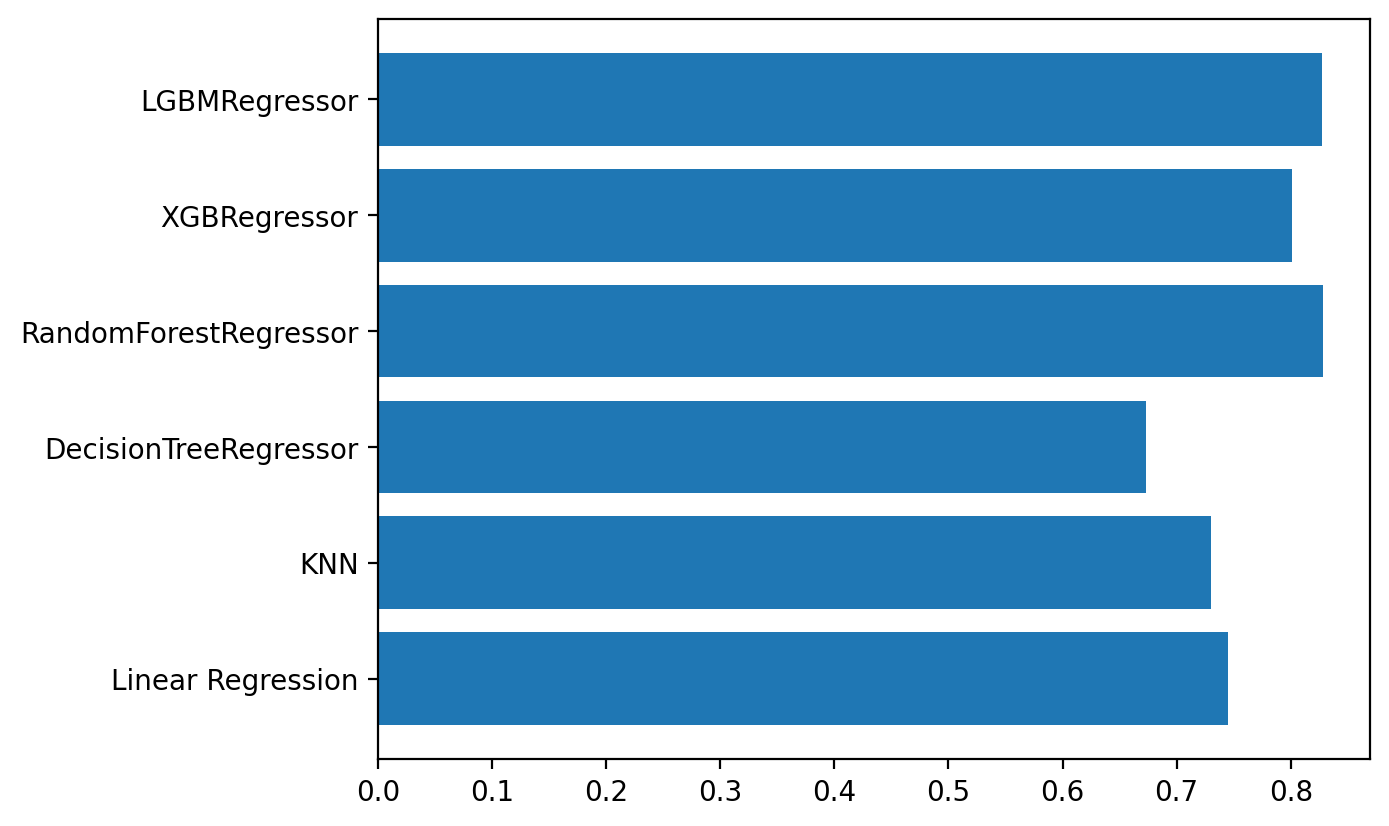

In [285]:
# 성능 시각화 비교
plt.barh(list(result), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

In [287]:
# 기본 모델 선언
model = RandomForestRegressor()

# 파라미터 지정
  # max_depth: range(1, 21)
params = {'max_depth': range(1,21)}

# 모델 선언


model = GridSearchCV(model,
                    params,
                    cv=5)




In [289]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 21)})

In [293]:
# 최적 파라미터, 예측 최고 성능

print('최적 파라미터:', model.best_params_)
print('예측 최고성능:', model.best_score_)

최적 파라미터: {'max_depth': 4}
예측 최고성능: 0.8517386938356684


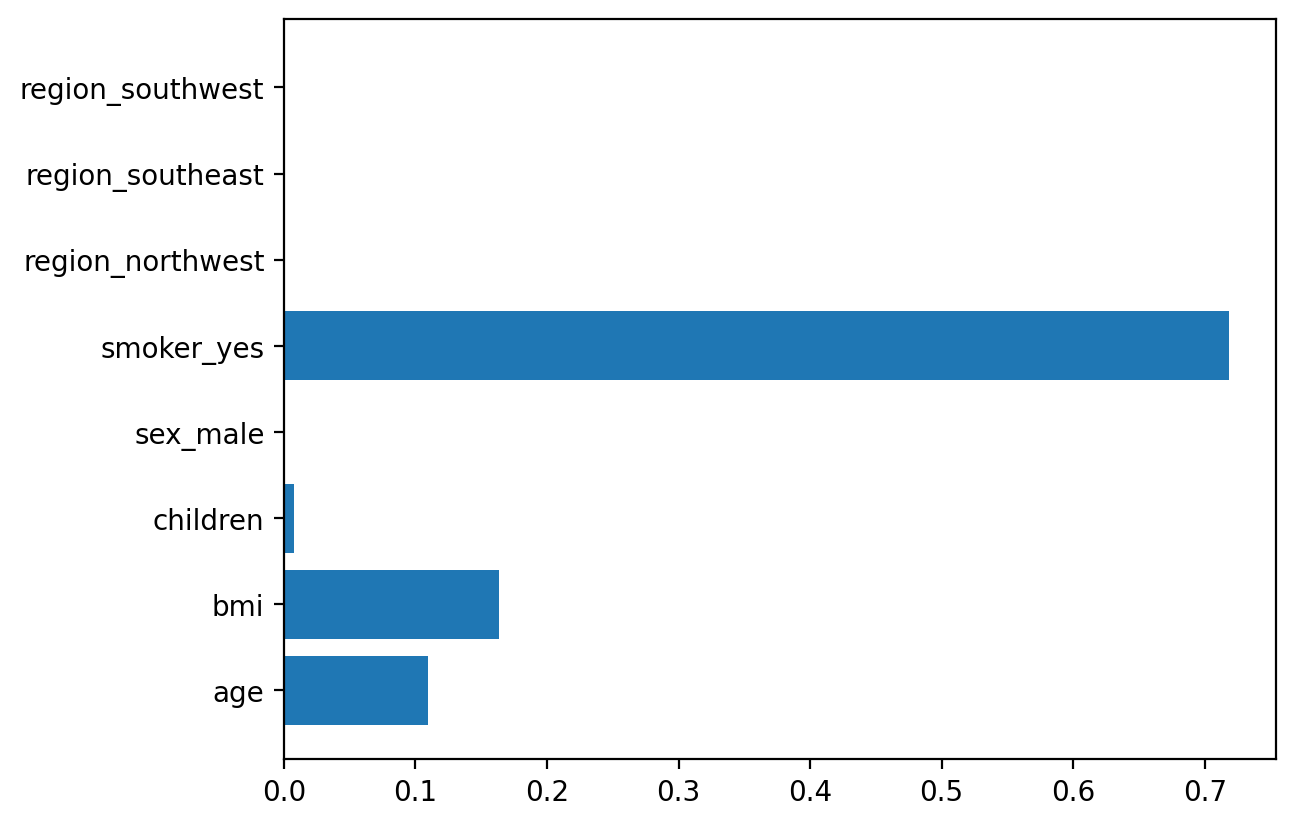

In [295]:
# 변수 중요도 시각화
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()



# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [301]:
# 예측하기
cv_score = cross_val_score(model , x_train ,y_train , cv = 5)

y_pred = model.predict(x_val)

In [306]:
# 성능평가


print('MAE:', mean_absolute_error(y_val, y_pred))
print('R2:' , r2_score(y_val, y_pred))
print(cv_score.mean())

MAE: 2538.8541206227897
R2: 0.8549828631441063
0.8524330615357496
